<h1>
<center>Navid Bahadoran</center>
</h1>
<h1>
<center>Homework 3, due September 27th, 11:59pm</center>
</h1>

<h2>
<center>September 20, 2023</center>
</h2>


1. Implement the Logistic Regression learning by gradient ascent as described in class.
Before using logistic regression, be sure to normalize the variables of the training set
to have zero mean and standard deviation 1, and to use the exact same transformation
on the test set, using the mean and standard deviation of the training set.

**a) Using the Gisette data, train a logistic regressor on the training set, starting
with $w^{(0)} = 0$, with 300 gradient ascent iterations and shrinkage $\lambda = 0.0001$ in
the update equation:
$$w^{(t+1)} ← w^{(t)} − \eta\lambda w^{(t)} +\frac{\eta}{N}\frac{\partial}{\partial w} L(w^{(t)})$$
where $L(w^{(t)})$ is the log likelihood from page 7 of the Logistic Regression
slides. Observe that there is an extra factor of $1/N$ in the loss term compared to
the class notes.
Find a good learning rate η such that the log-likelihood converges in at most 300
iterations and is monotonically increasing. Plot the training log-likelihood vs
iteration number. Report in a table the misclassification error on the training and
test set. On the same graph, plot the Receiver Operating Characteristic (ROC)
curve of the obtained model on the training and test set. (2 points)**

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
gisette_train_X_path = Path(r'D:\Pycharm\Courses\STA5635\HW3\Gisette\gisette_train.data')
gisette_train_label_path = Path(r'D:\Pycharm\Courses\STA5635\HW3\Gisette\gisette_train.labels')
gisette_test_X_path = Path(r'D:\Pycharm\Courses\STA5635\HW3\Gisette\gisette_valid.data')
gisette_test_label_path = Path(r'D:\Pycharm\Courses\STA5635\HW3\Gisette\gisette_valid.labels')

In [3]:
gisette_train_X = pd.read_csv(gisette_train_X_path, delimiter=' ', header=None).drop(5000,axis=1)
gisette_train_label=pd.read_csv(gisette_train_label_path, delimiter=' ', header=None)
gisette_test_X = pd.read_csv(gisette_test_X_path, delimiter=' ', header=None).drop(5000,axis=1)
gisette_test_label=pd.read_csv(gisette_test_label_path, delimiter=' ', header=None)

In [4]:
# normalize the variables of the training set to have zero mean and standard deviation 1 
# Also removing the samples with std=0 which degenerate our scaling
sx=np.std(gisette_train_X,axis=0)
filt=sx>0
gisette_train_X=gisette_train_X.to_numpy()[:,filt]
gisette_test_X=gisette_test_X.to_numpy()[:,filt]
mx=np.mean(gisette_train_X,axis=0)
sx=np.std(gisette_train_X,axis=0)
gisette_train_X=(gisette_train_X-mx)/sx
gisette_test_X=(gisette_test_X-mx)/sx

In [5]:
# convert the labels from-1,1 to 0,1
gisette_train_label.loc[gisette_train_label[0]==-1] = 0
gisette_test_label.loc[gisette_test_label[0]==-1] = 0

In [6]:
gisette_train_label=gisette_train_label.to_numpy()
gisette_test_label=gisette_test_label.to_numpy()

In [7]:
learning_rate=0.483
Lambda=0.0001
n_sample=len(gisette_train_X)
n_features=len(gisette_train_X[0])
n_iteration=300
w=np.zeros((n_features,1))

In [8]:
log_likelihood_list=[]
for i in range(n_iteration):
    XWT = gisette_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = gisette_train_X.T@(gisette_train_label-prob)
    w = w - learning_rate*Lambda*w + (learning_rate/n_sample)*gradient
    log_likelihood = (gisette_train_label.T@XWT)[0][0]- np.log(1+exp).sum()
    log_likelihood_list.append(log_likelihood)

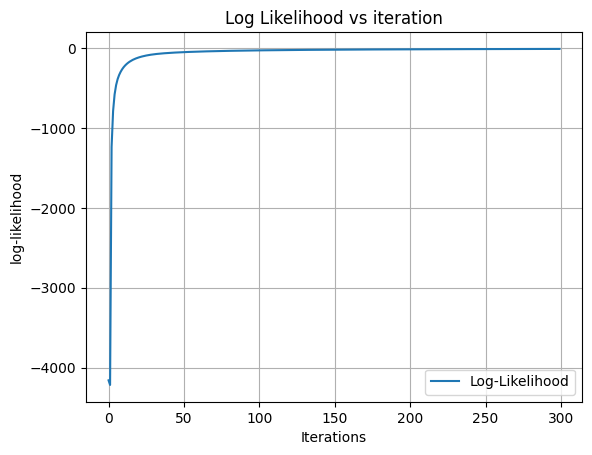

In [53]:
plt.plot(range(n_iteration),log_likelihood_list,label='Log-Likelihood')
plt.title('Log Likelihood vs iteration')
plt.xlabel('Iterations')
plt.ylabel('log-likelihood')
plt.grid()
plt.legend();

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
Pred_train = np.where((gisette_train_X@w)>0,1,0)
Pred_train_prob = np.exp(gisette_train_X@w)/(1+np.exp(gisette_train_X@w))
Pred_test =np.where((gisette_test_X@w)>0,1,0)
Pred_test_prob = np.exp(gisette_test_X@w)/(1+np.exp(gisette_test_X@w))

In [56]:
from IPython.display import HTML
d={'Training/Testing':['Train','Test'],'Error':[1-accuracy_score(gisette_train_label,Pred_train),1-accuracy_score(gisette_test_label,Pred_test)]}
HTML(pd.DataFrame(d).to_html(index=False))

Training/Testing,Error
Train,0.000
Test,0.019


In [57]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(gisette_train_label, Pred_train)
print('Train data ROC AUC=%.3f' % (auc_score_train))
auc_score_test = roc_auc_score(gisette_test_label, Pred_test)
print('Test data ROC AUC=%.3f' % (auc_score_test))

Train data ROC AUC=1.000
Test data ROC AUC=0.981


In [58]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(gisette_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(gisette_test_label, Pred_test_prob)

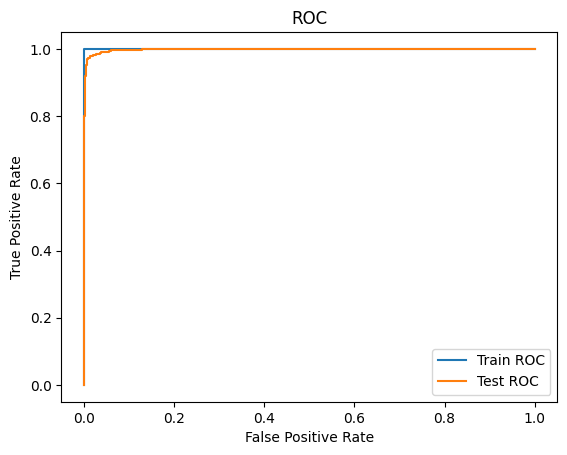

In [59]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend();

**b) Repeat point a) on the hill-valley dataset, where you might need as many
as 10,000 iterations for it to converge. (2 points)**

In [60]:
hill_valley_train_X_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/hill-valley/X.dat')
hill_valley_train_label_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/hill-valley/Y.dat')
hill_valley_test_X_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/hill-valley/Xtest.dat')
hill_valley_test_label_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/hill-valley/Ytest.dat')

In [65]:
hill_valley_train_X = pd.read_csv(hill_valley_train_X_path, delimiter=' ', header=None)
hill_valley_train_label=pd.read_csv(hill_valley_train_label_path, delimiter=' ', header=None)
hill_valley_test_X = pd.read_csv(hill_valley_test_X_path, delimiter=' ', header=None)
hill_valley_test_label=pd.read_csv(hill_valley_test_label_path, delimiter=' ', header=None)

In [67]:
# normalize the variables of the training set to have zero mean and standard deviation 1 
# Also removing the samples with std=0 which degenerate our scaling
sx=np.std(hill_valley_train_X,axis=0)
filt=sx>0
hill_valley_train_X=hill_valley_train_X.to_numpy()[:,filt]
hill_valley_test_X=hill_valley_test_X.to_numpy()[:,filt]
mx=np.mean(hill_valley_train_X,axis=0)
sx=np.std(hill_valley_train_X,axis=0)
hill_valley_train_X=(hill_valley_train_X-mx)/sx
hill_valley_test_X=(hill_valley_test_X-mx)/sx

In [70]:
hill_valley_train_label=hill_valley_train_label.to_numpy()
hill_valley_test_label=hill_valley_test_label.to_numpy()

In [71]:
learning_rate=0.1
Lambda=0.0001
n_sample=len(hill_valley_train_X)
n_features=len(hill_valley_train_X[0])
n_iteration=100000
w=np.zeros((n_features,1))

In [72]:
log_likelihood_list=[]
for i in range(n_iteration):
    XWT = hill_valley_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = hill_valley_train_X.T@(hill_valley_train_label-prob)
    w = w - learning_rate*Lambda*w + (learning_rate/n_sample)*gradient
    log_likelihood = (hill_valley_train_label.T@XWT)[0][0]- np.log(1+exp).sum()
    log_likelihood_list.append(log_likelihood)

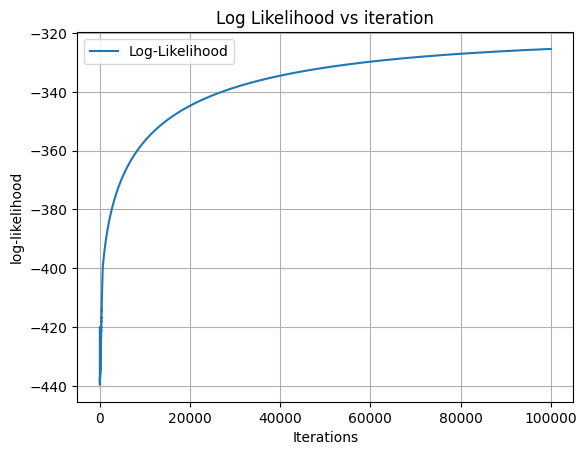

In [73]:
plt.plot(range(n_iteration),log_likelihood_list,label='Log-Likelihood')
plt.xlabel('Iterations')
plt.ylabel('log-likelihood')
plt.title('Log Likelihood vs iteration')
plt.grid()
plt.legend();

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
Pred_train = np.where((hill_valley_train_X@w)>0,1,0)
Pred_train_prob = np.exp(hill_valley_train_X@w)/(1+np.exp(hill_valley_train_X@w))
Pred_test =np.where((hill_valley_test_X@w)>0,1,0)
Pred_test_prob = np.exp(hill_valley_test_X@w)/(1+np.exp(hill_valley_test_X@w))

In [76]:
from IPython.display import HTML
d={'Training/Testing':['Train','Test'],'Error':[1-accuracy_score(hill_valley_train_label,Pred_train),1-accuracy_score(hill_valley_test_label,Pred_test)]}
HTML(pd.DataFrame(d).to_html(index=False))

Training/Testing,Error
Train,0.273927
Test,0.306931


In [77]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(hill_valley_train_label, Pred_train)
print('Train data ROC AUC=%.3f' % (auc_score_train))
auc_score_test = roc_auc_score(hill_valley_test_label, Pred_test)
print('Test data ROC AUC=%.3f' % (auc_score_test))

Train data ROC AUC=0.722
Test data ROC AUC=0.697


In [78]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(hill_valley_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(hill_valley_test_label, Pred_test_prob)

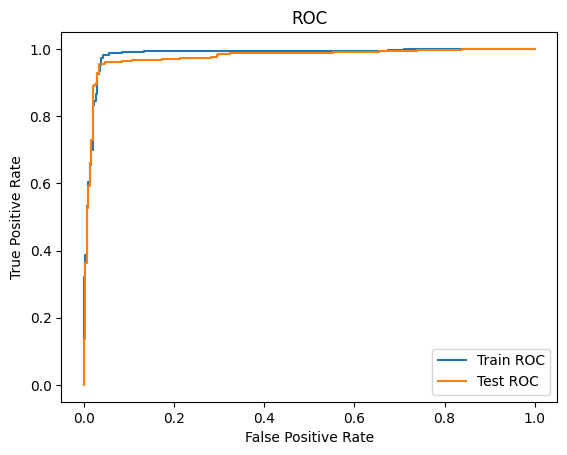

In [79]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

**c) Repeat point a) on the dexter dataset. (2 points)**

In [80]:
dexter_train_X_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/dexter/dexter_train.csv')
dexter_train_label_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/dexter/dexter_train.labels')
dexter_test_X_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/dexter/dexter_valid.csv')
dexter_test_label_path = Path(r'D:/Pycharm/Courses/STA5635/HW3/dexter/dexter_valid.labels')

In [81]:
dexter_train_X = pd.read_csv(dexter_train_X_path, delimiter=',', header=None)
dexter_train_label=pd.read_csv(dexter_train_label_path, delimiter=',', header=None)
dexter_test_X = pd.read_csv(dexter_test_X_path, delimiter=',', header=None)
dexter_test_label=pd.read_csv(dexter_test_label_path, delimiter=',', header=None)

In [82]:
# normalize the variables of the training set to have zero mean and standard deviation 1 
# Also removing the samples with std=0 which degenerate our scaling
sx=np.std(dexter_train_X,axis=0)
filt=sx>0
dexter_train_X=dexter_train_X.to_numpy()[:,filt]
dexter_test_X=dexter_test_X.to_numpy()[:,filt]
mx=np.mean(dexter_train_X,axis=0)
sx=np.std(dexter_train_X,axis=0)
dexter_train_X=(dexter_train_X-mx)/sx
dexter_test_X=(dexter_test_X-mx)/sx

In [83]:
dexter_train_label.loc[dexter_train_label[0]==-1] = 0
dexter_test_label.loc[dexter_test_label[0]==-1] = 0

In [84]:
dexter_train_label=dexter_train_label.to_numpy()
dexter_test_label=dexter_test_label.to_numpy()

In [85]:
learning_rate=0.47
Lambda=0.0001
n_sample=len(dexter_train_X)
n_features=len(dexter_train_X[0])
n_iteration=300
w=np.zeros((n_features,1))

In [86]:
log_likelihood_list=[]
for i in range(n_iteration):
    XWT = dexter_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = dexter_train_X.T@(dexter_train_label-prob)
    w = w - learning_rate*Lambda*w + (learning_rate/n_sample)*gradient
    log_likelihood = (dexter_train_label.T@XWT)[0][0]- np.log(1+exp).sum()
    log_likelihood_list.append(log_likelihood)

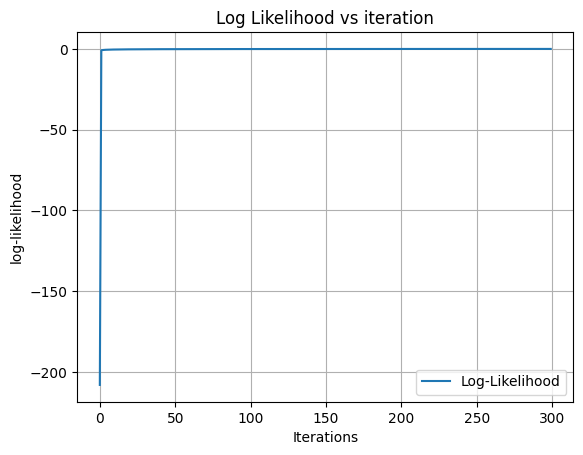

In [87]:
plt.plot(range(n_iteration),log_likelihood_list,label='Log-Likelihood')
plt.xlabel('Iterations')
plt.ylabel('log-likelihood')
plt.title('Log Likelihood vs iteration')
plt.grid()
plt.legend();

In [88]:
from sklearn.metrics import accuracy_score

In [89]:
Pred_train = np.where((dexter_train_X@w)>0,1,0)
Pred_train_prob = np.exp(dexter_train_X@w)/(1+np.exp(dexter_train_X@w))
Pred_test =np.where((dexter_test_X@w)>0,1,0)
Pred_test_prob = np.exp(dexter_test_X@w)/(1+np.exp(dexter_test_X@w))

In [91]:
from IPython.display import HTML
d={'Training/Testing':['Train','Test'],'Error':[1-accuracy_score(dexter_train_label,Pred_train),1-accuracy_score(dexter_test_label,Pred_test)]}
HTML(pd.DataFrame(d).to_html(index=False))

Training/Testing,Error
Train,0.00
Test,0.14


In [92]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(dexter_train_label, Pred_train)
print('Train data ROC AUC=%.3f' % (auc_score_train))
auc_score_test = roc_auc_score(dexter_test_label, Pred_test)
print('Test data ROC AUC=%.3f' % (auc_score_test))

Train data ROC AUC=1.000
Test data ROC AUC=0.860


In [93]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(dexter_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(dexter_test_label, Pred_test_prob)

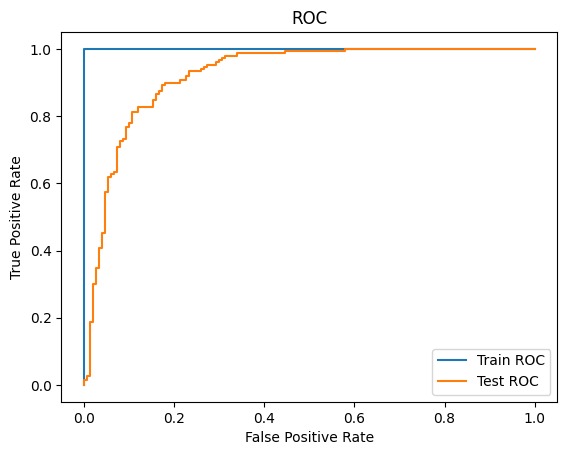

In [94]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend();

2. For the Gisette data, minimize by gradient descent the L1-penalized logistic loss:
$$C(w) = −\frac{1}{N}L(w) + \lambda \sum_{i=1}^{p}|w_{i}|$$,
by gradient descent starting from $w(0) = 0$, where $\lambda = 0.01$. Here $L(w)$ is again the
log likelihood from page 7 of the Logistic Regression slides.
Find a good learning rate $\eta$ such that the loss converges in at most 300 iterations
and is monotonically decreasing. Again, be sure to normalize the variables of the training set to have zero mean and standard deviation 1, and to use the exact same
transformation on the test set, using the mean and standard deviation of the training
set.

**a) Plot the training loss vs iteration number. Report in a table the misclassification
error on the training and test set. (1 point)**

In [95]:
learning_rate=0.15
Lambda=0.01
n_sample=len(gisette_train_X)
n_features=len(gisette_train_X[0])
n_iteration=300
w=np.zeros((n_features,1))

In [96]:
loss_list=[]
for i in range(n_iteration):
    XWT = gisette_train_X@w
    exp = np.exp(XWT)
    prob = exp/(1+exp)
    gradient = gisette_train_X.T@(gisette_train_label-prob)
    w = w - Lambda*learning_rate*np.sign(w) + (learning_rate/n_sample)*gradient
    log_likelihood = (gisette_train_label.T@XWT)[0][0]- np.log(1+exp).sum()
    loss=-log_likelihood/n_sample+(Lambda*np.abs(w)).sum()
    loss_list.append(loss)

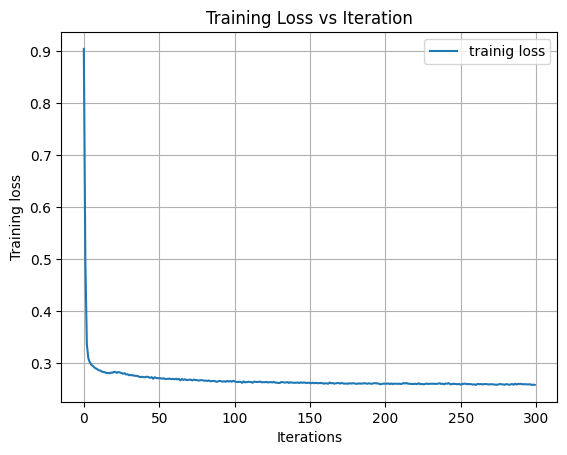

In [97]:
plt.plot(range(n_iteration),loss_list,label='trainig loss')
plt.xlabel('Iterations')
plt.ylabel('Training loss')
plt.title('Training Loss vs Iteration')
plt.grid()
plt.legend();

In [98]:
from sklearn.metrics import accuracy_score

In [99]:
Pred_train = np.where((gisette_train_X@w)>0,1,0)
Pred_train_prob = np.exp(gisette_train_X@w)/(1+np.exp(gisette_train_X@w))
Pred_test =np.where((gisette_test_X@w)>0,1,0)
Pred_test_prob = np.exp(gisette_test_X@w)/(1+np.exp(gisette_test_X@w))

In [100]:
from IPython.display import HTML
d={'Training/Testing':['Train','Test'],'Error':[1-accuracy_score(gisette_train_label,Pred_train),1-accuracy_score(gisette_test_label,Pred_test)]}
HTML(pd.DataFrame(d).to_html(index=False))

Training/Testing,Error
Train,0.021833
Test,0.028000


**b) On the same graph, plot the Receiver Operating Characteristic (ROC) curve of
the obtained model on the training and test set. (1 point)**

In [101]:
from sklearn.metrics import roc_auc_score
auc_score_train = roc_auc_score(gisette_train_label, Pred_train)
print('Train data ROC AUC=%.3f' % (auc_score_train))
auc_score_test = roc_auc_score(gisette_test_label, Pred_test)
print('Test data ROC AUC=%.3f' % (auc_score_test))

Train data ROC AUC=0.978
Test data ROC AUC=0.972


In [102]:
Pred_train = np.where((gisette_train_X@w)>0,1,0)
Pred_train_prob = np.exp(gisette_train_X@w)/(1+np.exp(gisette_train_X@w))
Pred_test =np.where((gisette_test_X@w)>0,1,0)
Pred_test_prob = np.exp(gisette_test_X@w)/(1+np.exp(gisette_test_X@w))

In [103]:
from sklearn.metrics import roc_curve
train_fp, train_tp, _ = roc_curve(gisette_train_label, Pred_train_prob)
test_fp, test_tp, _ = roc_curve(gisette_test_label, Pred_test_prob)

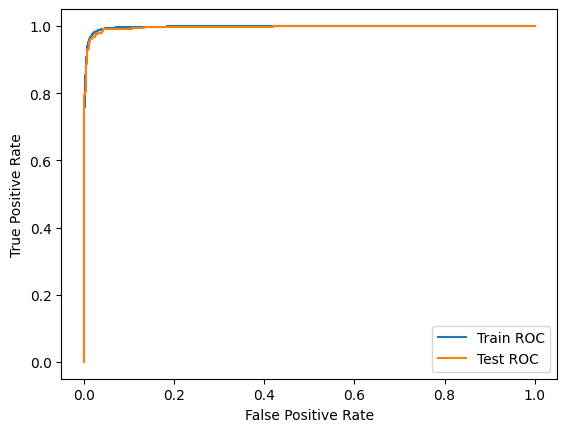

In [104]:
plt.plot(train_fp, train_tp, label='Train ROC')
plt.plot(test_fp, test_tp, label='Test ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

**c)How many nonzero entries are in $w$? How many values in w satisfy $|w_i| > \lambda$?
(1 point)**

In [105]:
print(f"Number of nonzeros entries in w is:{sum(w!=0)[0]}")

Number of nonzeros entries in w is:4955


In [107]:
print(f"Number of values in w satisfying |w\u1D62|> \u03BB is:{sum(abs(w)>Lambda)[0]}")

Number of values in w satisfying |wᵢ|> λ is:176
